# Bayesian Hyper-parameter Optimization

# Prospecting for gold...

<img src="img/daniel_krige.jpg" style="float: left;">
<img src="img/kriging.png" style="float: right;">


# Problem Statement

We are interested in solving

$ x^* = \underset{x}{\mathrm{argmin}} f(x)  $

under the constraints that

$ f $ is a black box for which no closed form is known (nor its gradients);
 
$ f $ is expensive to evaluate;

and evaluations of $ y = f(x) $ may be noisy.

**Finding**: Under these constraints, *Bayesian Optimization* is a good fit.

# Bayesian Optimization Loop

For $ t = 1 : T $:

  1. Given observations $ (x_i, y_i = f(x_i)) $ for $i = 1 : t $, build a probability model for the objective $f$ .
  2. Optimize a cheap acquisition/utility function $u$ based on the posterior distribution for sampling the next point:
  
  $ x_{t+1} = \underset{x}{\mathrm{argmin}} \ u(x) $
  
  Model uncertainty is used to balance exploration against exploitation.
  
  3. Sample the next observation $ y_{t+1} = f(x_{t+1})$
  
  
This procedure will build a sequence of models that model the relationship between the hyper-parameters and the performance metric hence its also called **Sequential Model-based Optimization**.

# Acquisition Functions
Acquisition functions $u(x)$ specify which sample $x$ should be tried next:

  * Expected improvement 
  * Lower confidence bound:
  * Probability of improvement
  
where $x^+_t$ is the best point observed so far.

In most cases, acquisition functions provide knobs (e.g., $\kappa$) for controlling the exploration-exploitation trade-off. 
  - Search in regions where $\mu_{GP}$ is high (exploitation) 
  - Probe regions where uncertainty $\kappa \sigma_{GP}$ is high (exploration)

# Toy Problem

TBD

# Bayesian Optimization with Scikit-optimize

Populating the interactive namespace from numpy and matplotlib


/home/peter/anaconda3/envs/aml/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


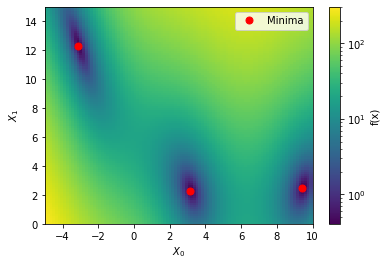

In [1]:
%pylab inline

from skopt.benchmarks import branin as branin
import utils

utils.plot_branin()

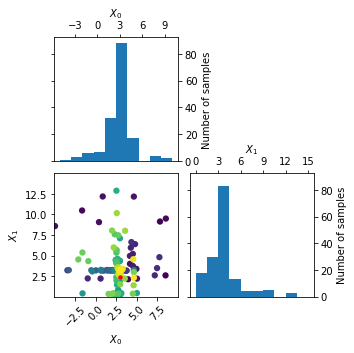

In [2]:
from skopt.plots import plot_evaluations
from skopt import forest_minimize


bounds = [(-5.0, 10.0), (0.0, 15.0)]
n_calls = 160

forest_res = forest_minimize(branin, bounds, n_calls=n_calls, base_estimator="ET",
                             random_state=4)

_ = plot_evaluations(forest_res, bins=10)

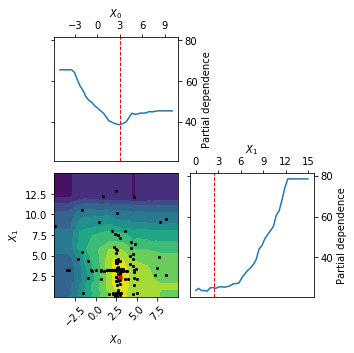

In [5]:
from skopt.plots import plot_objective

# plot partial-dependency between the objective function and each dimension
_ = plot_objective(forest_res)